In [1]:
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture

from sklearn.svm import LinearSVC
from PIL import Image

PCA

Selecting our subjects.
Using a random number generator, the following subjects were chosen:
18,43,25,40,26,46,34,19,52,13,36,10,5,54,9,56,64,17,22,63,11,4,55,45,2 and subject 69 (myself)



In [2]:
subjects = np.array([18,43,25,40,26,46,34,19,52,13,36,10,5,54,9,56,64,17,22,63,11,4,55,45,2 ])

X = []
for i in subjects:
    for j in range(170):
        image = Image.open(r"C:\Users\e0176208\Desktop\LeeSiEn_A0167775L_CA2\PIE\PIE\{}\{}.jpg".format(i,j+1)) #This line needs to be changed to match your image folder
        # convert image to numpy array
        data = np.asarray(image)
        X.append(data.flatten())
        
for i in range(10):
    image = Image.open(r"C:\Users\e0176208\Desktop\LeeSiEn_A0167775L_CA2\PIE\PIE\{}\{}.jpg".format(69, i+1)) #This line needs to be changed to match your image folder
    # convert image to numpy array
    data = np.asarray(image)
    X.append(data.flatten())
        
y = []
for i in subjects:
    for j in range(170):
        y.append(i)
        
for i in range(10):
    y.append(69)

X_train, X_test, y_train, y_test = train_test_split(X[:4250], y[:4250], test_size=0.3, random_state=42)

for i in range(4250,4257):
    X_train.append(X[i])
    
for i in range(7):
    y_train.append(69)
    
for i in range(4257,4260):
    X_test.append(X[i])
    
for i in range(3):
    y_test.append(69)
    
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
#Selecting 493 random images
random_images = []
y_random_images = []
random.seed(30)
random_images_index = random.sample(range(2975), 493)
for i in random_images_index:
    random_images.append(X_train[i])
    y_random_images.append(y_train[i])

    
#Adding in 7 selfie photos as training   
for i in range(2975,2982):
    random_images.append(X_train[i])
    y_random_images.append(y_train[i])
    
random_images = np.array(random_images)

Now,perform PCA to the 500 random images.

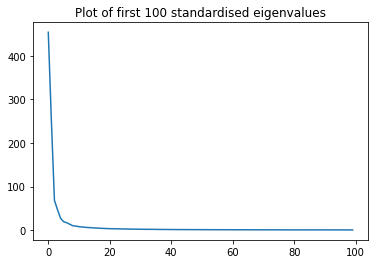

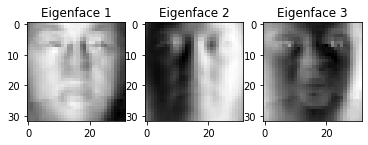

In [3]:
def PCA(random_images):
    features = random_images.T
    covariant_matrix = np.cov(features)
    eigenvalues,eigenvectors = np.linalg.eig(covariant_matrix)
    return eigenvalues,eigenvectors

eigenvalues,eigenvectors = PCA(random_images)

#Plot of first 100 eigenvalues
plt.plot(eigenvalues[:100].real)
plt.title('Plot of first 100 standardised eigenvalues')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    ef = eigenvectors[:,i].real.reshape([32,32])
    ax[i].imshow(ef, cmap='gray') 
    ax[i].title.set_text('Eigenface {}'.format(i+1))

In [4]:
projected_1 = random_images[:493].dot(eigenvectors.T[0].real)
projected_2 = random_images[:493].dot(eigenvectors.T[1].real)
projected_3 = random_images[:493].dot(eigenvectors.T[2].real)

projected_4 = random_images[493:].dot(eigenvectors.T[0].real)
projected_5 = random_images[493:].dot(eigenvectors.T[1].real)
projected_6 = random_images[493:].dot(eigenvectors.T[2].real)

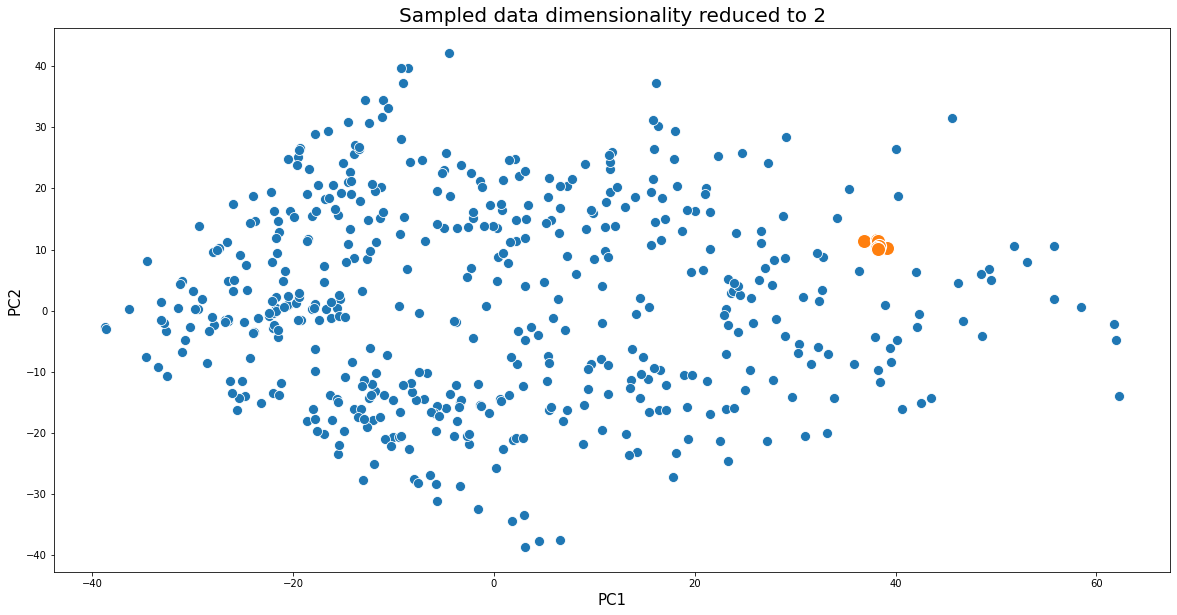

In [5]:
plt.figure(figsize=(20, 10))
plt.title('Sampled data dimensionality reduced to 2', fontsize = 20)
sns.scatterplot(x = projected_1, y = projected_2, s=100)
sns.scatterplot(x = projected_4, y = projected_5, s=200)
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.show()

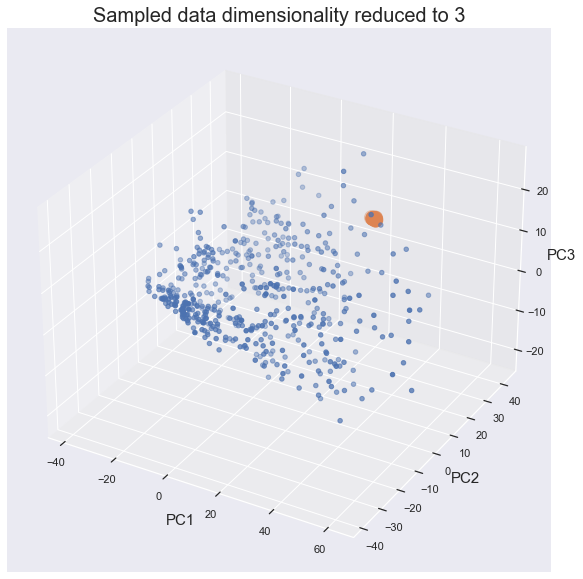

In [6]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = projected_1
y = projected_2
z = projected_3

ax.set_title('Sampled data dimensionality reduced to 3', fontsize = 20)
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC2", fontsize = 15)
ax.set_zlabel("PC3", fontsize = 15)

ax.scatter(x, y, z)
ax.scatter(projected_4, projected_5, projected_6, s= 200)
plt.show()

In [7]:
eigenvalues,eigenvectors = PCA(X_train)
dim = [40,80,200]

for j in dim:
    X_train_d = np.array([X_train.dot(eigenvectors.T[0].real)]).T
    
    for i in range(1,j):
        projected = X_train.dot(eigenvectors.T[i].real)
        X_train_d = np.concatenate((X_train_d,np.array([projected]).T),axis=1)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_d, y_train)
    
    X_test_d = np.array([X_test.dot(eigenvectors.T[0].real)]).T

    for i in range(1,j):
        projected = X_test.dot(eigenvectors.T[i].real)
        X_test_d = np.concatenate((X_test_d,np.array([projected]).T),axis=1)
        
    print('The training accuracy in {}-dimensional space is {}'.format(j, knn.score(X_train_d[:2975], y_train[:2975])))
    print('The selfie training accuracy in {}-dimensional space is {}'.format(j, knn.score(X_train_d[2975:], y_train[2975:])))

    print('The testing accuracy in {}-dimensional space is {}'.format(j, knn.score(X_test_d[:1275], y_test[:1275])))
    print('The selfie testing accuracy in {}-dimensional space is {}'.format(j, knn.score(X_test_d[1275:], y_test[1275:])))

The training accuracy in 40-dimensional space is 1.0
The selfie training accuracy in 40-dimensional space is 1.0
The testing accuracy in 40-dimensional space is 0.9356862745098039
The selfie testing accuracy in 40-dimensional space is 1.0
The training accuracy in 80-dimensional space is 1.0
The selfie training accuracy in 80-dimensional space is 1.0
The testing accuracy in 80-dimensional space is 0.9427450980392157
The selfie testing accuracy in 80-dimensional space is 1.0
The training accuracy in 200-dimensional space is 1.0
The selfie training accuracy in 200-dimensional space is 1.0
The testing accuracy in 200-dimensional space is 0.9474509803921569
The selfie testing accuracy in 200-dimensional space is 1.0


LDA

In [8]:
def my_LDA (random_images, y_random_images, dim):
    mean_vectors = []
    for cl in np.unique(y_random_images):
        mean_vectors.append(np.mean(random_images[y_random_images==cl], axis=0))


    sw = np.zeros((1024,1024))
    for cl,mv in zip(np.unique(y_random_images), mean_vectors):
        class_s = np.zeros((1024,1024))                 
        for row in random_images[y_random_images == cl]:
            class_s += np.outer((row-mv), (row-mv))
        sw += class_s

    overall_mean = np.mean(random_images, axis=0)
    sb = np.zeros((1024,1024))
    for i,class_mean in enumerate(mean_vectors):  
        n = random_images[y_random_images == np.unique(y_random_images)[i],:].shape[0]
        sb += n * np.outer((class_mean - overall_mean),(class_mean - overall_mean))

    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(sw).dot(sb))

    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    W = eig_pairs[0][1].reshape(1024,1)
    for i in range(1,dim):
        W = np.hstack((W, eig_pairs[i][1].reshape(1024,1)))
    
    return W

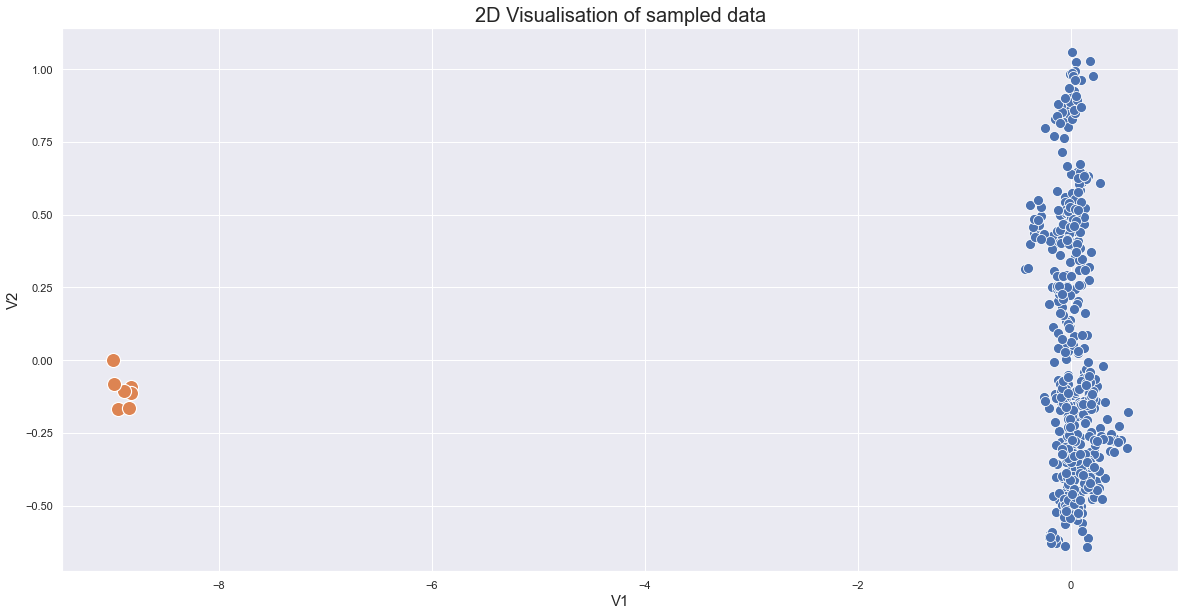

In [9]:
X_lda = random_images.dot(my_LDA (random_images, y_random_images, 2))

plt.figure(figsize=(20, 10))
sns.scatterplot(x = X_lda[:,0][:493].real, y = X_lda[:,1][:493].real, s=100)
sns.scatterplot(x = X_lda[:,0][493:].real, y = X_lda[:,1][493:].real, s=200)
plt.title('2D Visualisation of sampled data', fontsize = 20)
plt.xlabel('V1', fontsize = 15)
plt.ylabel('V2', fontsize = 15)
plt.show()

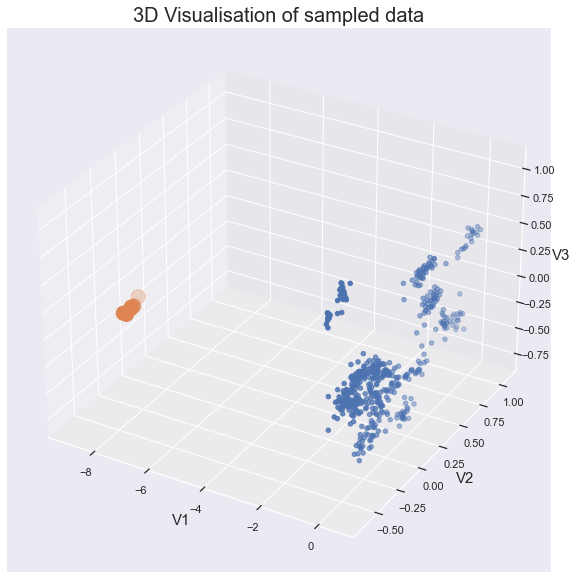

In [10]:
X_lda = random_images.dot(my_LDA (random_images, y_random_images, 3))

sns.set(style = "darkgrid")
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('3D Visualisation of sampled data',fontsize = 20)

ax.set_xlabel("V1",fontsize = 15)
ax.set_ylabel("V2", fontsize = 15)
ax.set_zlabel("V3", fontsize = 15)

ax.scatter(X_lda[:,0][:493].real, X_lda[:,1][:493].real, X_lda[:,2][:493].real)
ax.scatter(X_lda[:,0][493:].real, X_lda[:,1][493:].real, X_lda[:,2][493:].real, s= 200)
plt.show()

In [11]:
dimensions = [2,3,9]
for dim in dimensions:
    
    X_lda_train = X_train.dot(my_LDA (X_train, y_train, dim)).real
    X_lda_test =  X_test.dot(my_LDA (X_train, y_train, dim)).real  
    

    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_lda_train, y_train)
    
    print('The training accuracy in {}-dimensional space is {}'.format(dim, knn.score(X_lda_train[:2975], y_train[:2975])))
    print('The selfie training accuracy in {}-dimensional space is {}'.format(dim, knn.score(X_lda_train[2975:], y_train[2975:])))

    print('The testing accuracy in {}-dimensional space is {}'.format(dim, knn.score(X_lda_test[:1275], y_test[:1275])))
    print('The selfie testing accuracy in {}-dimensional space is {}'.format(dim, knn.score(X_lda_test[1275:], y_test[1275:])))

The training accuracy in 2-dimensional space is 1.0
The selfie training accuracy in 2-dimensional space is 1.0
The testing accuracy in 2-dimensional space is 0.2415686274509804
The selfie testing accuracy in 2-dimensional space is 1.0
The training accuracy in 3-dimensional space is 1.0
The selfie training accuracy in 3-dimensional space is 1.0
The testing accuracy in 3-dimensional space is 0.4619607843137255
The selfie testing accuracy in 3-dimensional space is 1.0
The training accuracy in 9-dimensional space is 1.0
The selfie training accuracy in 9-dimensional space is 1.0
The testing accuracy in 9-dimensional space is 0.899607843137255
The selfie testing accuracy in 9-dimensional space is 1.0


GMM

In [12]:
eigenvalues,eigenvectors = PCA(X_train)
dim = [80,200]

train_post_PCA = {}
test_post_PCA = {}

for j in dim:
    X_train_d = np.array([X_train.dot(eigenvectors.T[0].real)]).T
    #selfie_train_d = np.array([X_train.dot(eigenvectors.T[0].real)]).T
    
    for i in range(1,j):
        projected = X_train.dot(eigenvectors.T[i].real)
        X_train_d = np.concatenate((X_train_d,np.array([projected]).T),axis=1)
        
    train_post_PCA[j] = X_train_d
    
    X_test_d = np.array([X_test.dot(eigenvectors.T[0].real)]).T

    for i in range(1,j):
        projected = X_test.dot(eigenvectors.T[i].real)
        X_test_d = np.concatenate((X_test_d,np.array([projected]).T),axis=1)
        
    test_post_PCA[j] = X_test_d

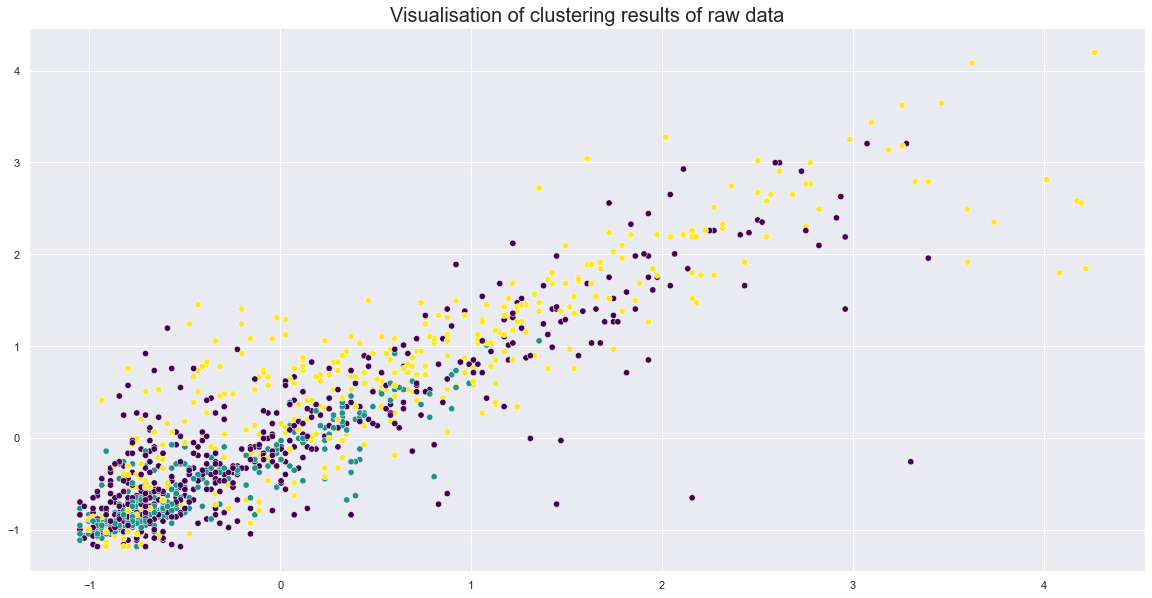

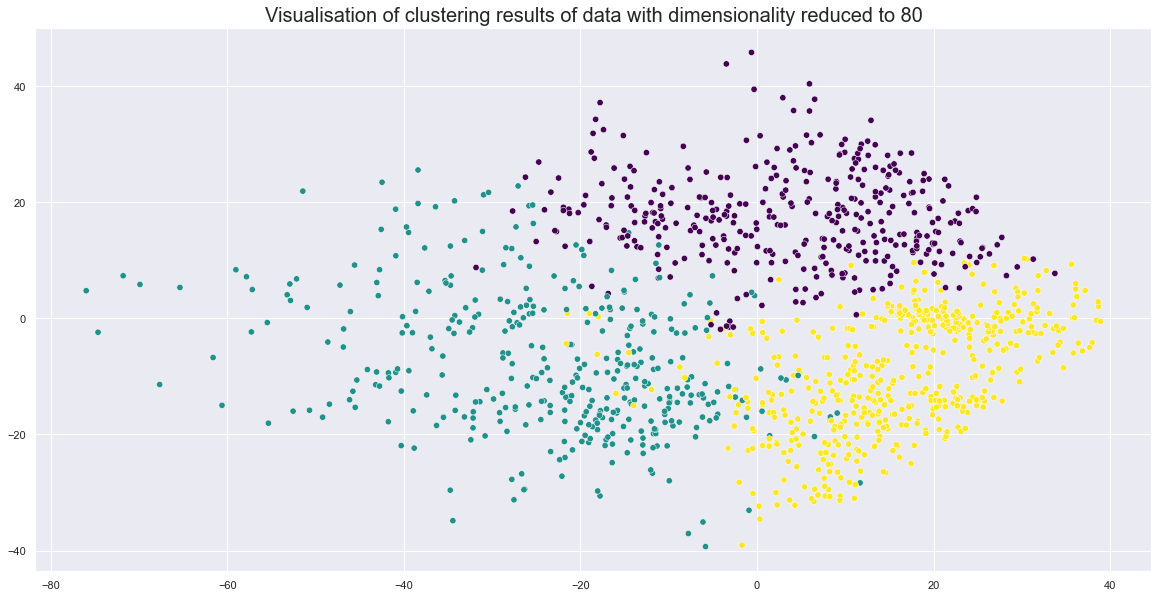

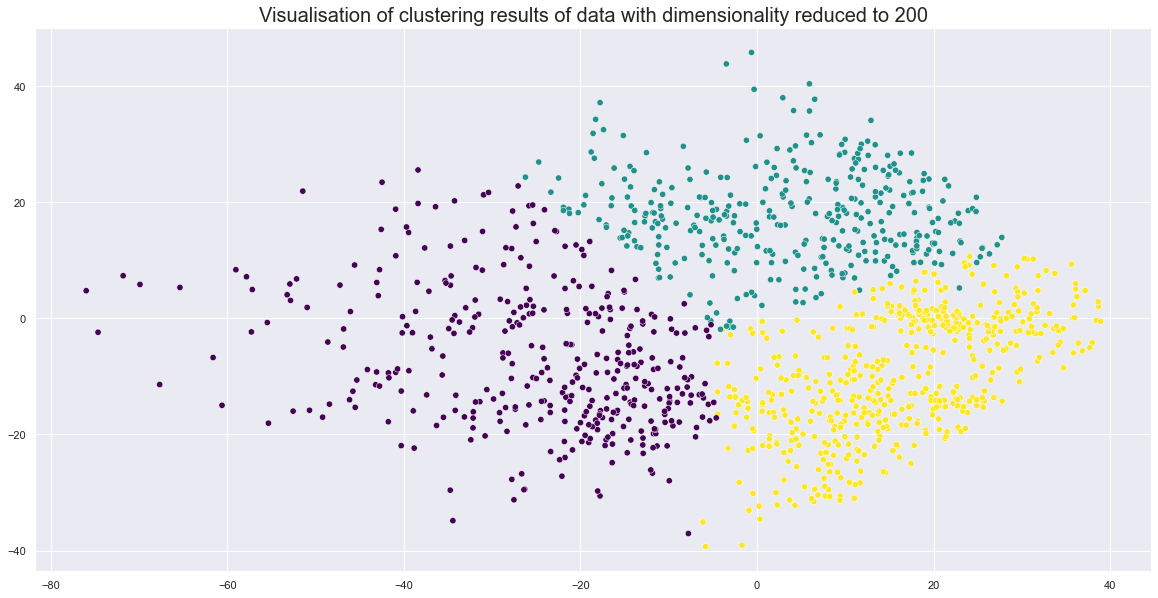

In [13]:
gmm = GaussianMixture(n_components=3).fit(X_train)
labels = gmm.fit_predict(X_test)
plt.figure(figsize=(20, 10))
sns.scatterplot(x = X_test[:, 0], y = X_test[:, 1], c = labels, s=40, cmap = 'viridis')
plt.title('Visualisation of clustering results of raw data' ,fontsize = 20)

for i in dim:
    gmm = GaussianMixture(n_components=3).fit(train_post_PCA[i])
    labels = gmm.fit_predict(test_post_PCA[i])
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x = test_post_PCA[i][:, 0], y = test_post_PCA[i][:, 1], c = labels, s=40, cmap = 'viridis');
    plt.title('Visualisation of clustering results of data with dimensionality reduced to {}'.format(i) ,fontsize = 20)
    
plt.show()

SVC

In [14]:
eigenvalues,eigenvectors = PCA(X_train)
dim = [80,200]

train_post_PCA = {}
test_post_PCA = {}

for j in dim:
    X_train_d = np.array([X_train.dot(eigenvectors.T[0].real)]).T
    #selfie_train_d = np.array([X_train.dot(eigenvectors.T[0].real)]).T
    
    for i in range(1,j):
        projected = X_train.dot(eigenvectors.T[i].real)
        X_train_d = np.concatenate((X_train_d,np.array([projected]).T),axis=1)
        
    train_post_PCA[j] = X_train_d
    
    X_test_d = np.array([X_test.dot(eigenvectors.T[0].real)]).T

    for i in range(1,j):
        projected = X_test.dot(eigenvectors.T[i].real)
        X_test_d = np.concatenate((X_test_d,np.array([projected]).T),axis=1)
        
    test_post_PCA[j] = X_test_d

In [15]:
c = [0.01, 0.1, 1]
for i in c:
    clf = LinearSVC(C = i, random_state = 0, max_iter = 100000)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print("Training accuracy of linear SVC when C= {}, undreduced dimensions is {}" .format(i, train_acc * 100))
    print("Testing accuracy of linear SVC when C= {}, unreduced dimesions is {}" .format(i, test_acc * 100))

for j in dim:
    for i in c:
        clf = LinearSVC(C = i, random_state = 0, max_iter = 100000)
        clf.fit(train_post_PCA[j], y_train)
        train_acc = clf.score(train_post_PCA[j], y_train)
        test_acc = clf.score(test_post_PCA[j], y_test)
        print("Training accuracy of linear SVC when C= {}, dimensions reduced to {} is {}" .format(i, j,train_acc * 100))
        print("Testing accuracy of linear SVC when C= {}, dimesions reduced to {} is {}" .format(i, j, test_acc * 100))


Training accuracy of linear SVC when C= 0.01, undreduced dimensions is 99.93293091884641
Testing accuracy of linear SVC when C= 0.01, unreduced dimesions is 97.80907668231612
Training accuracy of linear SVC when C= 0.1, undreduced dimensions is 100.0
Testing accuracy of linear SVC when C= 0.1, unreduced dimesions is 97.4960876369327
Training accuracy of linear SVC when C= 1, undreduced dimensions is 100.0
Testing accuracy of linear SVC when C= 1, unreduced dimesions is 97.4960876369327
Training accuracy of linear SVC when C= 0.01, dimensions reduced to 80 is 97.68611670020121
Testing accuracy of linear SVC when C= 0.01, dimesions reduced to 80 is 95.85289514866979
Training accuracy of linear SVC when C= 0.1, dimensions reduced to 80 is 99.49698189134809
Testing accuracy of linear SVC when C= 0.1, dimesions reduced to 80 is 96.94835680751174
Training accuracy of linear SVC when C= 1, dimensions reduced to 80 is 100.0
Testing accuracy of linear SVC when C= 1, dimesions reduced to 80 is 9

Neural Networks for Classification

In [16]:
#Unfortunately, even though our targets are numerical, they are inconsistent. 
#Therefore, they need to be one hot encoded
from sklearn.preprocessing import OneHotEncoder

X_train= np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)


onehot_encoder = OneHotEncoder(sparse=False)
y_train_reshaped = y_train.reshape(len(y_train), 1)
y_train_onehot_encoded = onehot_encoder.fit_transform(y_train_reshaped)

y_test_reshaped = y_test.reshape(len(y_test), 1)
y_test_onehot_encoded = onehot_encoder.fit_transform(y_test_reshaped)

In [17]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(20, (5, 5), activation='relu', input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(50, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(26, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot_encoded, validation_data = (X_test,y_test_onehot_encoded), epochs=50, batch_size=128)

Train on 2982 samples, validate on 1278 samples
Epoch 1/50
2982/2982 [==============================] - 2s 527us/sample - loss: 2.8528 - accuracy: 0.2036 - val_loss: 2.0754 - val_accuracy: 0.4593
Epoch 2/50
2982/2982 [==============================] - 1s 373us/sample - loss: 1.3776 - accuracy: 0.6392 - val_loss: 0.8356 - val_accuracy: 0.7653
Epoch 3/50
2982/2982 [==============================] - 1s 373us/sample - loss: 0.5371 - accuracy: 0.8652 - val_loss: 0.4088 - val_accuracy: 0.9022
Epoch 4/50
2982/2982 [==============================] - 1s 368us/sample - loss: 0.2538 - accuracy: 0.9326 - val_loss: 0.2667 - val_accuracy: 0.9311
Epoch 5/50
2982/2982 [==============================] - 1s 378us/sample - loss: 0.1599 - accuracy: 0.9618 - val_loss: 0.1638 - val_accuracy: 0.9632
Epoch 6/50
2982/2982 [==============================] - 1s 364us/sample - loss: 0.0994 - accuracy: 0.9785 - val_loss: 0.1487 - val_accuracy: 0.9609
Epoch 7/50
2982/2982 [==============================] - 1s 366us

In [18]:
model.summary()

model.evaluate(X_train, y_train_onehot_encoded, batch_size=128)
model.evaluate(X_test, y_test_onehot_encoded, batch_size=128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               625500    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1

[0.08008164744343206, 0.986698]

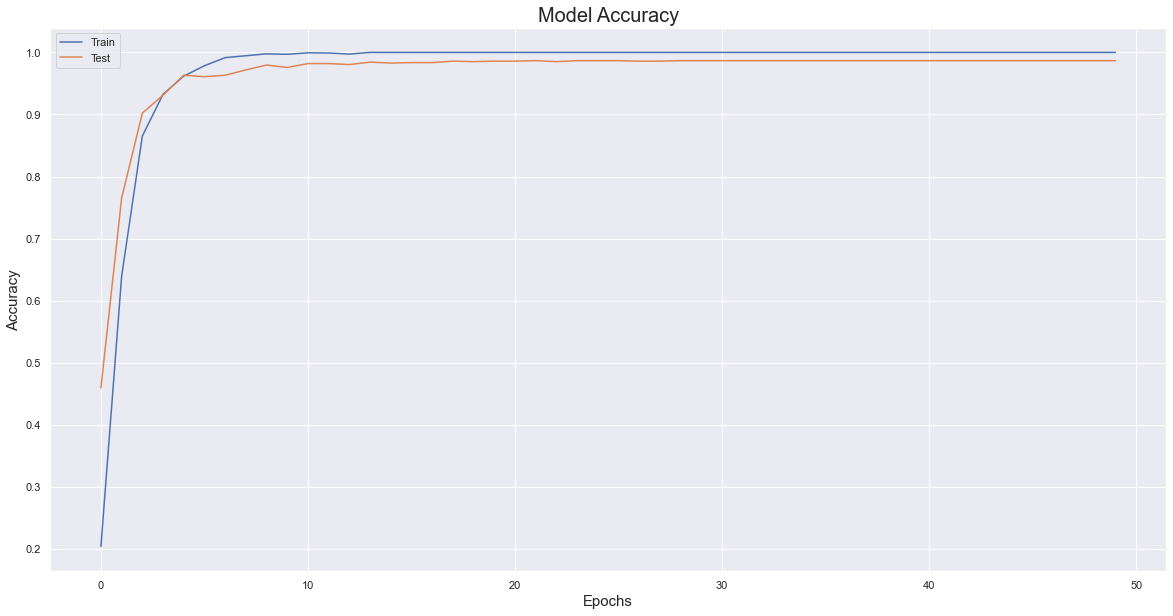

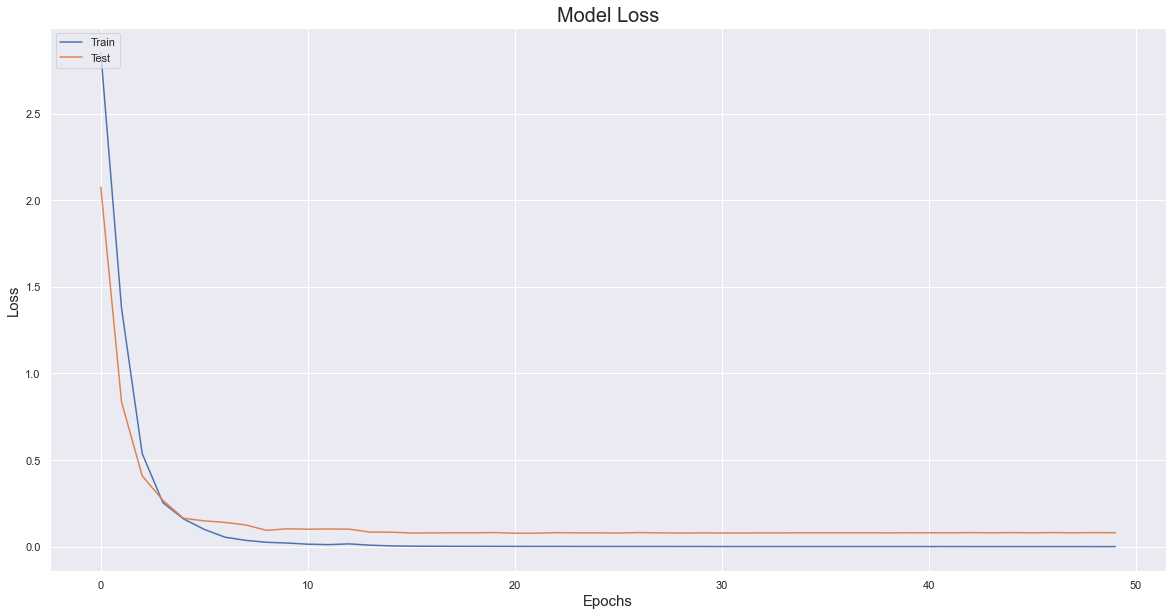

In [19]:
# summarize history for accuracy
epochs = [i for i in range(50)]

plt.figure(figsize=(20, 10))
sns.lineplot(y = history.history['accuracy'], x = epochs)
sns.lineplot(y = history.history['val_accuracy'], x = epochs)
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(20, 10))
sns.lineplot(y = history.history['loss'], x = epochs)
sns.lineplot(y = history.history['val_loss'], x = epochs)
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
